In [503]:
person = '''
person=我们|找|餐厅
我们= 你|她|你们|他们
找=看看|转一转|查一查
餐厅=中餐|西餐|烧烤
'''

In [504]:
import random,jieba

In [505]:
host = '''
host=问候 咨询 食物 礼貌 
问候=您好|早上好|下午好
咨询=需要|你需要
食物=饮料|套餐
饮料=水|橙汁|beer
套餐=牛肉|猪肉
礼貌=吗？

'''

In [562]:
def generate_n(grammar_str, split='=', line_split='\n'):
    grammar = {}
    for line in grammar_str.split('\n'):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        #print(exp,stmt)
        #print(stmt)

            #print(s)
            #print(exp)
        ss=[]
        for s in stmt.split('|'):
            ss.append(s.split())
        #print(ss)
        grammar[exp.strip()]=ss
    return grammar

In [563]:
print(generate_n(person))

{'person': [['我们'], ['找'], ['餐厅']], '我们': [['你'], ['她'], ['你们'], ['他们']], '找': [['看看'], ['转一转'], ['查一查']], '餐厅': [['中餐'], ['西餐'], ['烧烤']]}


In [632]:
def genrate(gar,target):
    e_list=[]
    choice=random.choice
    if target not in gar:return target
    expend=[genrate(gar,t) for t in choice(gar[target])]
    #print(expend)
    return ''.join([e if e != '/n' else '\n' for e in expend if e != 'null'])
    #for e in expend:
        #if e != 'null' or e != '/n':
           # e_list.append(e)
        #else:
         #   '\n'
    #return ''.join(e_list)

In [633]:
sen=generate_n(host,split='=')

In [634]:
sen

{'host': [['问候', '咨询', '食物', '礼貌']],
 '问候': [['您好'], ['早上好'], ['下午好']],
 '咨询': [['需要'], ['你需要']],
 '食物': [['饮料'], ['套餐']],
 '饮料': [['水'], ['橙汁'], ['beer']],
 '套餐': [['牛肉'], ['猪肉']],
 '礼貌': [['吗？']]}

In [635]:
genrate(gar=generate_n(host,split='='),target='host')

'下午好你需要猪肉吗？'

In [636]:
import os,pandas as pd
import jieba


In [637]:
print (os.path.abspath('.'))

/Users/wangli


In [638]:
filename='file:///Users/wangli/Desktop/train.csv'

In [639]:
content=pd.read_csv(filename,encoding='gb18030')


In [640]:
content.head()

,number,Unnamed: 1,Unnamed: 2,Unnamed: 3,content,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,0,++$++,disability-insurance,++$++,法律要求残疾保险吗？,++$++,Is,Disability,Insurance,Required,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,++$++,life-insurance,++$++,债权人可以在死后人寿保险吗？,++$++,Can,Creditors,Take,Life,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,++$++,renters-insurance,++$++,旅行者保险有租赁保险吗？,++$++,Does,Travelers,Insurance,Have,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,++$++,auto-insurance,++$++,我可以开一辆没有保险的新车吗？,++$++,Can,I,Drive,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,++$++,life-insurance,++$++,人寿保险的现金转出价值是否应纳税？,++$++,Is,The,Cash,Surrender,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [641]:
articles = content['content']

In [642]:
len(articles)

12889

In [643]:
from collections import Counter

In [644]:
import re,jieba

In [645]:
def taken(string):
    return re.findall('\w+',string)

In [646]:
srt_listcut=[''.join(taken(str(a))) for a in articles]

In [647]:
len(srt_listcut)

12889

In [648]:
srt_listcut

['法律要求残疾保险吗',
 '债权人可以在死后人寿保险吗',
 '旅行者保险有租赁保险吗',
 '我可以开一辆没有保险的新车吗',
 '人寿保险的现金转出价值是否应纳税',
 '如何报告年金收入',
 'AAA家庭保险涵盖什么',
 '什么是简单的退休计划',
 '社会保险残疾保险是什么',
 '汽车保险是否预付',
 '医疗保险B部分盖什么',
 '退伍军人能否获得人寿保险',
 '我的房主保险是否包括失去的结婚戒指',
 '分配风险汽车保险如何工作',
 '我的男朋友可以加我的汽车保险吗',
 '我是否需要提交私人财产车祸索赔的警察报告',
 '全覆盖汽车保险盖修理',
 '人生在伊斯兰教中是否可以接受',
 '健康保险是否覆盖管道逆转',
 '如果您已经诊断为乳腺癌您可以获得多大的人寿保险',
 '我需要注册医疗保险',
 '短期残疾保险是否工作',
 '房主保险盖池',
 '什么时候要注册医疗保险',
 'MIP会影响我的汽车保险吗',
 '蓝十字蓝盾有人寿保险吗',
 '长期护理保险的优点和缺点是什么',
 '医疗保险支付生命预警',
 '我应该买哪种人寿',
 '医疗保险支付HPV筛查吗',
 '哪个是最好的人寿保险',
 '长期护理保险费用多少',
 '固定年金如何安全',
 '要解决人寿保险索赔需要多长时间',
 '是否检查汽车保险信贷',
 '我可以使用HSA支付长期护理保险吗',
 '雇主可以向吸烟者收取更多健康保险费吗',
 '房屋所有权保险通常覆盖什么',
 '没有健康保险的超声波成本是多少',
 '什么是10年期人寿保险',
 '你可以把钱放在一个401K和一个Roth',
 '我可以用丙型肝炎保险吗',
 '什么时候可以注册医疗保险A部分',
 '健康保险何时起源',
 '医疗保险有多重要',
 '租用保险费用多少',
 '我的家庭保险是否覆盖盗窃',
 '租户保险如何受益业主',
 '俄亥俄州雇主是否必须提供健康保险',
 '我应该有多少汽车保险',
 '为什么房主保险增加',
 '谁能买医保',
 '如何清除Medicare',
 '在什么年龄我应该得到长期护理保险',
 '人寿保险死亡福利是否应纳税',
 '什么是医疗储蓄计划',
 '房主保险是否向其他狗盖狗叮咬',
 '医疗保险计划盖什么',
 '全人寿保险是一个好的选择吗',

In [649]:
with open('homework.txt', 'w') as f:
    for a in srt_listcut:
        f.write(a + '\n')

In [650]:
ls


Applications/             PycharmProjects/          untitled.txt
Applications (Parallels)/ Untitled Folder/          打印list的.ipynb
Desktop/                  Untitled Folder 1/        未命名.ipynb
Documents/                Untitled Folder 2/        未命名1.ipynb
Downloads/                Untitled.ipynb            未命名2.ipynb
Library/                  Untitled1.ipynb           未命名3.ipynb
Movies/                   anaconda3/                未命名4.ipynb
Music/                    article_9k.txt            未命名5.ipynb
Parallels/                homework.txt              对称方程.ipynb
Pictures/                 nlp-01-作业.ipynb         闰年计算公式.ipynb
Public/                   nlp_lesson01.ipynb


In [651]:
def cut_list(string):
    return list(jieba.cut(string))

In [652]:
TOKEN=[]

In [653]:
for i,line in enumerate((open('homework.txt'))):
    if i%100==0:print(i)
    if i>1000: break
    
    TOKEN+=cut_list(line)
    

0
100
200
300
400
500
600
700
800
900
1000


In [654]:
from functools import reduce

In [655]:
from operator import add, mul

In [656]:
reduce(add,[1,3,5])

9

In [657]:
print(TOKEN[:100])

['法律', '要求', '残疾', '保险', '吗', '\n', '债权人', '可以', '在', '死', '后', '人寿保险', '吗', '\n', '旅行者', '保险', '有', '租赁', '保险', '吗', '\n', '我', '可以', '开', '一辆', '没有', '保险', '的', '新车', '吗', '\n', '人寿保险', '的', '现金', '转', '出', '价值', '是否', '应', '纳税', '\n', '如何', '报告', '年', '金', '收入', '\n', 'AAA', '家庭', '保险', '涵盖', '什么', '\n', '什么', '是', '简单', '的', '退休', '计划', '\n', '社会保险', '残疾', '保险', '是', '什么', '\n', '汽车保险', '是否', '预付', '\n', '医疗保险', 'B', '部分', '盖', '什么', '\n', '退伍军人', '能否', '获得', '人寿保险', '\n', '我', '的', '房主', '保险', '是否', '包括', '失去', '的', '结婚戒指', '\n', '分配', '风险', '汽车保险', '如何', '工作', '\n', '我', '的', '男朋友']


In [658]:
workcounter=Counter(TOKEN)

In [659]:
workcounter.most_common(100)

[('\n', 1001),
 ('保险', 397),
 ('的', 270),
 ('人寿保险', 224),
 ('什么', 220),
 ('吗', 207),
 ('是', 192),
 ('我', 169),
 ('是否', 144),
 ('可以', 143),
 ('健康', 117),
 ('多少', 110),
 ('医疗保险', 109),
 ('汽车保险', 91),
 ('在', 85),
 ('如何', 80),
 ('覆盖', 79),
 ('你', 72),
 ('残疾', 60),
 ('有', 58),
 ('房主', 54),
 ('需要', 53),
 ('谁', 49),
 ('家庭', 43),
 ('获得', 42),
 ('长期', 42),
 ('为什么', 39),
 ('护理', 37),
 ('购买', 37),
 ('计划', 36),
 ('年', 32),
 ('退休', 31),
 ('涵盖', 30),
 ('支付', 29),
 ('应该', 29),
 ('金', 25),
 ('得到', 25),
 ('租客', 25),
 ('中', 24),
 ('没有', 23),
 ('时候', 23),
 ('如果', 22),
 ('一个', 22),
 ('您', 21),
 ('何时', 21),
 ('租赁', 20),
 ('会', 20),
 ('哪里', 20),
 ('Medigap', 20),
 ('提供', 19),
 ('能', 19),
 ('工作', 18),
 ('为', 18),
 ('保险费用', 18),
 ('汽车', 18),
 ('全', 17),
 ('人寿', 17),
 ('租金', 17),
 ('公司', 17),
 ('从', 16),
 ('和', 15),
 ('最好', 15),
 ('钱', 15),
 ('便宜', 15),
 ('了', 15),
 ('政策', 15),
 ('部分', 13),
 ('影响', 13),
 ('好', 13),
 ('费用', 13),
 ('要求', 12),
 ('对', 12),
 ('现金', 11),
 ('盖', 11),
 ('注册', 11),
 ('要', 11),
 ('Medic

In [660]:
frequiences =[f for w,f in workcounter.most_common(100) ]

In [661]:
x = [i for i in range(100)]

In [662]:
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [663]:
%matplotlib inline

In [664]:
import matplotlib.pyplot as plt

In [665]:
import numpy as np

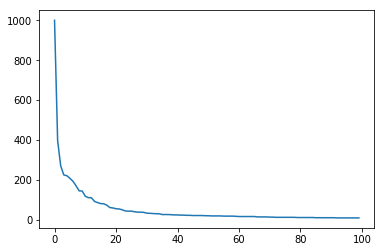

In [666]:
plt.plot(x, frequiences)

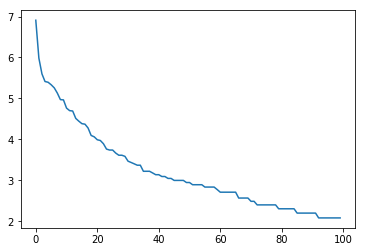

In [667]:
plt.plot(x, np.log(frequiences))

In [668]:
def prob_1(word):
    return workcounter[word] / len(TOKEN)

In [669]:
prob_1('保险')

0.05689309257666953

In [670]:
TOKEN[:10]

['法律', '要求', '残疾', '保险', '吗', '\n', '债权人', '可以', '在', '死']

In [671]:
TOKEN =[str(t) for t in TOKEN ]

In [672]:
TOKEN

['法律',
 '要求',
 '残疾',
 '保险',
 '吗',
 '\n',
 '债权人',
 '可以',
 '在',
 '死',
 '后',
 '人寿保险',
 '吗',
 '\n',
 '旅行者',
 '保险',
 '有',
 '租赁',
 '保险',
 '吗',
 '\n',
 '我',
 '可以',
 '开',
 '一辆',
 '没有',
 '保险',
 '的',
 '新车',
 '吗',
 '\n',
 '人寿保险',
 '的',
 '现金',
 '转',
 '出',
 '价值',
 '是否',
 '应',
 '纳税',
 '\n',
 '如何',
 '报告',
 '年',
 '金',
 '收入',
 '\n',
 'AAA',
 '家庭',
 '保险',
 '涵盖',
 '什么',
 '\n',
 '什么',
 '是',
 '简单',
 '的',
 '退休',
 '计划',
 '\n',
 '社会保险',
 '残疾',
 '保险',
 '是',
 '什么',
 '\n',
 '汽车保险',
 '是否',
 '预付',
 '\n',
 '医疗保险',
 'B',
 '部分',
 '盖',
 '什么',
 '\n',
 '退伍军人',
 '能否',
 '获得',
 '人寿保险',
 '\n',
 '我',
 '的',
 '房主',
 '保险',
 '是否',
 '包括',
 '失去',
 '的',
 '结婚戒指',
 '\n',
 '分配',
 '风险',
 '汽车保险',
 '如何',
 '工作',
 '\n',
 '我',
 '的',
 '男朋友',
 '可以',
 '加',
 '我',
 '的',
 '汽车保险',
 '吗',
 '\n',
 '我',
 '是否',
 '需要',
 '提交',
 '私人',
 '财产',
 '车祸',
 '索赔',
 '的',
 '警察',
 '报告',
 '\n',
 '全',
 '覆盖',
 '汽车保险',
 '盖',
 '修理',
 '\n',
 '人生',
 '在',
 '伊斯兰教',
 '中',
 '是否',
 '可以',
 '接受',
 '\n',
 '健康',
 '保险',
 '是否',
 '覆盖',
 '管道',
 '逆转',
 '\n',
 '如果',
 '您',
 '已经',
 '诊断',
 '

In [673]:
TOKEN_2_GRAM=[''.join(TOKEN[i:i+2])for i in range(len(TOKEN[:-2]))]

In [674]:
TOKEN_2_GRAM

['法律要求',
 '要求残疾',
 '残疾保险',
 '保险吗',
 '吗\n',
 '\n债权人',
 '债权人可以',
 '可以在',
 '在死',
 '死后',
 '后人寿保险',
 '人寿保险吗',
 '吗\n',
 '\n旅行者',
 '旅行者保险',
 '保险有',
 '有租赁',
 '租赁保险',
 '保险吗',
 '吗\n',
 '\n我',
 '我可以',
 '可以开',
 '开一辆',
 '一辆没有',
 '没有保险',
 '保险的',
 '的新车',
 '新车吗',
 '吗\n',
 '\n人寿保险',
 '人寿保险的',
 '的现金',
 '现金转',
 '转出',
 '出价值',
 '价值是否',
 '是否应',
 '应纳税',
 '纳税\n',
 '\n如何',
 '如何报告',
 '报告年',
 '年金',
 '金收入',
 '收入\n',
 '\nAAA',
 'AAA家庭',
 '家庭保险',
 '保险涵盖',
 '涵盖什么',
 '什么\n',
 '\n什么',
 '什么是',
 '是简单',
 '简单的',
 '的退休',
 '退休计划',
 '计划\n',
 '\n社会保险',
 '社会保险残疾',
 '残疾保险',
 '保险是',
 '是什么',
 '什么\n',
 '\n汽车保险',
 '汽车保险是否',
 '是否预付',
 '预付\n',
 '\n医疗保险',
 '医疗保险B',
 'B部分',
 '部分盖',
 '盖什么',
 '什么\n',
 '\n退伍军人',
 '退伍军人能否',
 '能否获得',
 '获得人寿保险',
 '人寿保险\n',
 '\n我',
 '我的',
 '的房主',
 '房主保险',
 '保险是否',
 '是否包括',
 '包括失去',
 '失去的',
 '的结婚戒指',
 '结婚戒指\n',
 '\n分配',
 '分配风险',
 '风险汽车保险',
 '汽车保险如何',
 '如何工作',
 '工作\n',
 '\n我',
 '我的',
 '的男朋友',
 '男朋友可以',
 '可以加',
 '加我',
 '我的',
 '的汽车保险',
 '汽车保险吗',
 '吗\n',
 '\n我',
 '我是否',
 '是否需要',
 '需要提交',
 '提交私人',
 '私人财产',
 '财产车祸',

In [675]:

TOKEN_2_GRAM[:10]

['法律要求', '要求残疾', '残疾保险', '保险吗', '吗\n', '\n债权人', '债权人可以', '可以在', '在死', '死后']

In [676]:
counter_GRAM2=Counter(TOKEN_2_GRAM)

In [677]:
counter_GRAM2

Counter({'法律要求': 2,
         '要求残疾': 1,
         '残疾保险': 55,
         '保险吗': 39,
         '吗\n': 207,
         '\n债权人': 2,
         '债权人可以': 2,
         '可以在': 16,
         '在死': 1,
         '死后': 2,
         '后人寿保险': 1,
         '人寿保险吗': 25,
         '\n旅行者': 2,
         '旅行者保险': 1,
         '保险有': 2,
         '有租赁': 2,
         '租赁保险': 20,
         '\n我': 86,
         '我可以': 40,
         '可以开': 2,
         '开一辆': 1,
         '一辆没有': 1,
         '没有保险': 6,
         '保险的': 27,
         '的新车': 2,
         '新车吗': 1,
         '\n人寿保险': 47,
         '人寿保险的': 11,
         '的现金': 3,
         '现金转': 1,
         '转出': 1,
         '出价值': 1,
         '价值是否': 1,
         '是否应': 4,
         '应纳税': 4,
         '纳税\n': 4,
         '\n如何': 47,
         '如何报告': 1,
         '报告年': 1,
         '年金': 23,
         '金收入': 1,
         '收入\n': 2,
         '\nAAA': 2,
         'AAA家庭': 2,
         '家庭保险': 33,
         '保险涵盖': 8,
         '涵盖什么': 8,
         '什么\n': 63,
         '\n什么': 126,
         '什么是': 97

In [678]:
def prob_1(word):
    return workcounter[word] / len(TOKEN)

In [679]:
prob_1('我们')

0.0008598452278589854

In [680]:
def prob_2(word1,word2):
    if word1+word2 in counter_GRAM2:return counter_GRAM2[word1+word2]/len(counter_GRAM2)
    else:
        return 1/len(counter_GRAM2)

In [681]:
prob_2('租赁','保险')

0.006238303181534623

In [682]:
prob_2('我','残疾')

0.00031191515907673113

In [704]:
def  generate_get (sentence):
    word=cut_list(sentence)
    sentence_pro=1
    for i,w in enumerate(word[:-1]):
        next_=word[i+1]
        problity=prob_2(w,next_)
        sentence_pro*=problity
    return sentence_pro
        

In [705]:
 generate_get('我可以要买保险')

3.7862206453146176e-13

In [706]:
 generate_get ('我是一个无敌的美女')

1.4762245186036406e-17

In [718]:
import random

In [771]:
 
def generate_best():
   
    for f in [genrate(gar=sen,target='host') for i in range(10)]:
        #print('sentence: {} with Prb: {}'.format(f,  generate_get (f)))
        list_f=[f, generate_get (f)]
        print(list_f)
    return list_f

In [772]:
list_f=generate_best()

['早上好需要猪肉吗？', 9.465551613286542e-15]
['您好需要猪肉吗？', 9.465551613286542e-15]
['您好你需要牛肉吗？', 5.9048980744145614e-18]
['早上好需要橙汁吗？', 9.465551613286542e-15]
['早上好需要猪肉吗？', 9.465551613286542e-15]
['早上好你需要beer吗？', 5.9048980744145614e-18]
['早上好需要水吗？', 9.465551613286542e-15]
['下午好需要牛肉吗？', 2.9524490372072807e-18]
['您好你需要猪肉吗？', 5.9048980744145614e-18]
['下午好你需要beer吗？', 1.841827222212901e-21]


In [774]:
list_f.sort(key=lambda x: x[1])

TypeError: 'float' object is not subscriptable

In [775]:

ss=generate_best().sort(key=None,reverse=False)
    

['早上好需要橙汁吗？', 9.465551613286542e-15]
['您好你需要beer吗？', 5.9048980744145614e-18]
['您好你需要水吗？', 5.9048980744145614e-18]
['下午好你需要水吗？', 1.841827222212901e-21]
['早上好你需要橙汁吗？', 5.9048980744145614e-18]
['您好需要beer吗？', 9.465551613286542e-15]
['下午好需要橙汁吗？', 2.9524490372072807e-18]
['下午好需要橙汁吗？', 2.9524490372072807e-18]
['下午好需要牛肉吗？', 2.9524490372072807e-18]
['您好你需要水吗？', 5.9048980744145614e-18]


TypeError: '<' not supported between instances of 'float' and 'str'